기존의 모델에서 데이터를 개선하여 모델의 성능을 높여 보겠습니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

우선 항상 같은 결과를 보장하기 위해 랜덤 시드를 고정하겠습니다.

In [ ]:
# 공정한 비교를 위한 랜덤 시드 고정

import random
import numpy as np

seed = 14

np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

## 정규화 영향 확인

데이터 정규화가 정말 모델의 성능에 영향을 미치는지 확인해 보도록 하겠습니다!

정규화를 수행한 데이터와 수행하지 않은 데이터로 같은 구조의 모델을 학습한 뒤, 두 모델의 성능을 비교하는 식으로 진행해 보겠습니다.

In [ ]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train_norm = x_train / 255.0  # 0~255 값을 0~1로 정규화
x_test_norm = x_test / 255.0

# 레이블을 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


In [ ]:
print("이미지 크기 :", x_train[0].shape)
print("정규화 전 :", np.max(x_train[0]), np.min(x_train[0]))
print("정규화 후 :", np.max(x_train_norm[0]), np.min(x_train_norm[0]))

이미지 크기 : (28, 28)
정규화 전 : 255 0
정규화 후 : 1.0 0.0


In [ ]:
def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # 28x28 이미지를 1차원 벡터로 변환
        layers.Dense(128, activation='relu'),  # 128 뉴런의 완전 연결층
        layers.Dense(10, activation='softmax') # 10개의 출력 클래스 (0~9 숫자)
    ])

    # 모델 컴파일
    model.compile(optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = create_model()
model_norm = create_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


학습하기 전, 정규화 데이터로 학습한 모델과 정규화 데이터로 학습하지 않은 모델의 내부 변화를 확인하기 위해 모델의 중간 레이어 결과를 먼저 출력하겠습니다.

In [ ]:
# 모델 학습 경과를 확인하기 위한 중간 레이어 모델 설정.

mid_model = models.Model(inputs=model.layers[0].input,
                                  outputs=model.layers[1].output)

mid_norm_model = models.Model(inputs=model_norm.layers[0].input,
                                       outputs=model_norm.layers[1].output)

# 학습 전 모델의 출력 결과 확인
before = mid_model.predict(x_train[0].reshape(-1, 28, 28))
norm_before = mid_norm_model.predict(x_train_norm[0].reshape(-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


이제 각 모델을 학습하고 결과를 확인해 봅시다.

In [ ]:
# 정규화 하지 않은 데이터로 모델 학습
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1598 - loss: 121.9799 - val_accuracy: 0.2064 - val_loss: 2.1204
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2472 - loss: 2.0105 - val_accuracy: 0.3312 - val_loss: 1.8831
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3099 - loss: 1.9119 - val_accuracy: 0.4144 - val_loss: 1.6690
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3670 - loss: 1.7523 - val_accuracy: 0.3236 - val_loss: 2.0867
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3495 - loss: 1.8201 - val_accuracy: 0.3326 - val_loss: 1.8287


In [ ]:
# 정규화 한 데이터로 모델 학습
model_norm.fit(x_train_norm, y_train, epochs=5, batch_size=64, validation_data=(x_test_norm, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6410 - loss: 1.3312 - val_accuracy: 0.8798 - val_loss: 0.4657
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8796 - loss: 0.4532 - val_accuracy: 0.9011 - val_loss: 0.3627
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8978 - loss: 0.3698 - val_accuracy: 0.9112 - val_loss: 0.3217
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9079 - loss: 0.3310 - val_accuracy: 0.9174 - val_loss: 0.2968
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9150 - loss: 0.3058 - val_accuracy: 0.9227 - val_loss: 0.2787


정확도에서 확실히 차이가 있음. (대략 33%(정규화 안 한 모델) vs 92%(정규화 수행한 모델))

In [ ]:
# 학습 후 모델의 출력 결과 확인

after = mid_model.predict(x_train[0].reshape(-1, 28, 28))
norm_after = mid_norm_model.predict(x_train_norm[0].reshape(-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


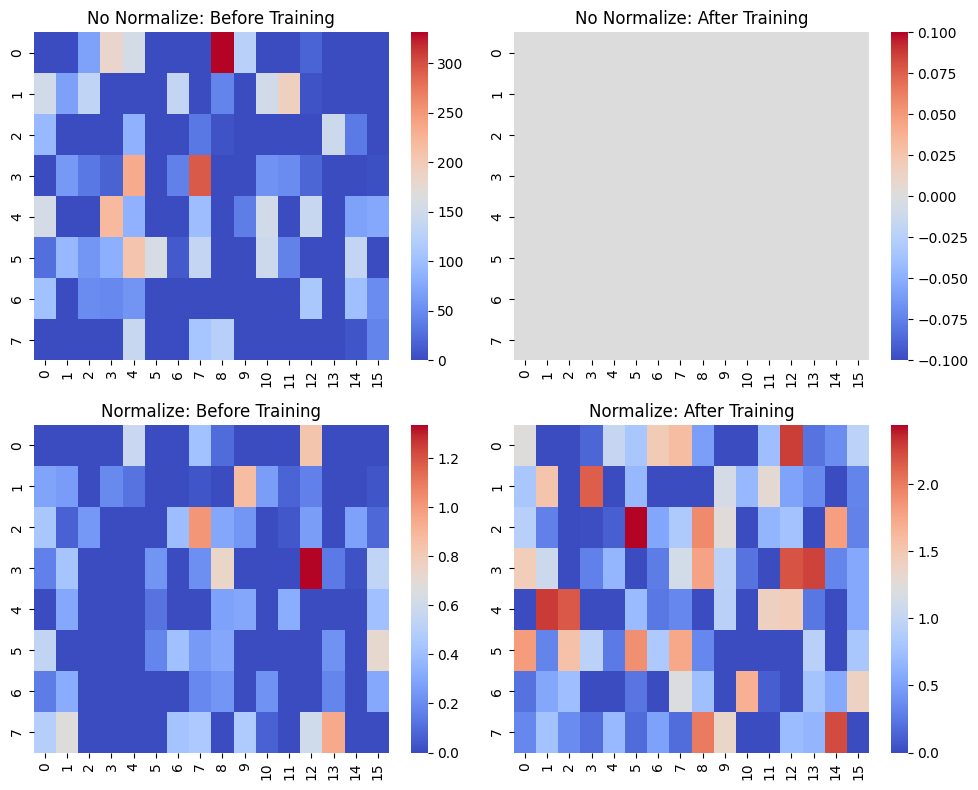

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 중간 레이어 출력 값을 2D 형태로 변형
before_reshaped = before.reshape(8, -1)  # 8x16 형태 (128 뉴런 기준)
after_reshaped = after.reshape(8, -1)
norm_before_reshaped = norm_before.reshape(8, -1)
norm_after_reshaped = norm_after.reshape(8, -1)

# 히트맵 시각화
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.heatmap(before_reshaped, cmap="coolwarm", ax=ax[0, 0])
ax[0, 0].set_title("No Normalize: Before Training")

sns.heatmap(after_reshaped, cmap="coolwarm", ax=ax[0, 1])
ax[0, 1].set_title("No Normalize: After Training")

sns.heatmap(norm_before_reshaped, cmap="coolwarm", ax=ax[1, 0])
ax[1, 0].set_title("Normalize: Before Training")

sns.heatmap(norm_after_reshaped, cmap="coolwarm", ax=ax[1, 1])
ax[1, 1].set_title("Normalize: After Training")

plt.tight_layout()
plt.show()

그래프의 왼쪽과 오른쪽은 각각 학습 전과 학습 후의 모델 출력을 나타내고, 위는 비정규화 모델, 아래는 정규화 모델입니다.

두 모델의 학습 전과 학습 후의 색상 변화를 보면,
* 비정규화 모델은 학습 후에 출력값들이 사라진 것을 볼 수 있습니다.
* 반면 정규화 모델은 학습 후에 더 다양한 출력값을 보여줍니다.

이처럼 **정규화는 모델이 학습하는 과정에서 다양한 입력 값의 범위 차이를 줄여 더 효과적으로 학습할 수 있도록 도와줍니다.**

## 데이터셋 양의 영향

모델에 가장 큰 영향을 미치는 데이터의 요소 중 하나는 데이터셋의 양입니다. 데이터셋의 양이 모델 성능에 어떤 영향을 미치는지 살펴봅시다.

In [ ]:
x_train = x_train_norm
x_test = x_test_norm

# 학습 데이터의 양을 12000개로 줄임.
x_small, _, y_small, _ = train_test_split(x_train, y_train, train_size=0.2, random_state=seed)

print(x_small.shape)

(12000, 28, 28)


In [ ]:
model_small = create_model()

# 모델 학습
model_small.fit(x_small, y_small, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4139 - loss: 1.9310 - val_accuracy: 0.7790 - val_loss: 1.0966
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8037 - loss: 0.9751 - val_accuracy: 0.8386 - val_loss: 0.7200
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8546 - loss: 0.6748 - val_accuracy: 0.8640 - val_loss: 0.5750
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8732 - loss: 0.5496 - val_accuracy: 0.8760 - val_loss: 0.4999
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8862 - loss: 0.4812 - val_accuracy: 0.8827 - val_loss: 0.4539


전체 60,000장 데이터로 학습한 모델보다 정확도가 5% 정도(92% vs 87%) 떨어진 것을 확인할 수 있습니다.

이렇듯 데이터셋의 양을 늘리는 것만으로도 모델의 성능을 향상 시킬 수 있습니다.

## 데이터셋의 양을 증가시켜보자 (Data Augmentation)

그렇다면 데이터를 더 이상 수집할 수 없다면 어떡할까요?

기존의 데이터들을 변형하여 새로운 데이터처럼 모델에 학습 시키는 방법을 데이터 증강(Data Augmentation)이라고 합니다.

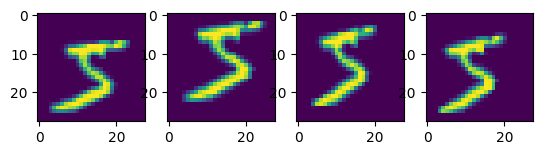

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터 증강기
datagen = ImageDataGenerator(
    rotation_range=10,         # 이미지 회전 반경 0~10도
    zoom_range=0.1,            # 이미지 확대 비율 0~10%
    width_shift_range=0.1,     # 이미지 가로 방향 0~10% 이동
    height_shift_range=0.1,    # 이미지 세로 방향 0~10% 이동
    fill_mode='nearest',       # 빈 픽셀은 가장 가까운 값으로 채움
)

# 증강된 데이터 보기
sample = x_train[0].reshape((1, 28, 28, 1))
imgs = datagen.flow(sample, batch_size=4)

fig, ax = plt.subplots(1, 4)

for i, img in enumerate(imgs):
    ax[i].imshow(img.reshape(28, 28))
    if i == 3:
        break

In [ ]:
model_aug = create_model()

# 64장씩 증강기법이 적용된 이미지와 라벨을 반환하는 iterator
aug_datagen = datagen.flow(x_small.reshape(-1, 28, 28, 1), y_small, batch_size=64)

# 모델 학습
model_aug.fit(aug_datagen, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.2268 - loss: 2.2001 - val_accuracy: 0.6716 - val_loss: 1.5682
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4959 - loss: 1.7480 - val_accuracy: 0.7854 - val_loss: 1.1350
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5648 - loss: 1.4888 - val_accuracy: 0.8151 - val_loss: 0.9143
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6022 - loss: 1.3296 - val_accuracy: 0.8338 - val_loss: 0.7922
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6365 - loss: 1.2263 - val_accuracy: 0.8433 - val_loss: 0.7218


데이터 증강을 했는데 오히려 테스트셋 정확도가 떨어진 것을 확인할 수 있습니다.

이는 데이터 증강이 오히려 테스트셋의 특성과 다른 특성의 데이터를 만들어 냈기 때문입니다.

테스트셋은 전체적으로 숫자가 가운데에 위치하며 회전이 적은 경우가 많습니다.

따라서 숫자를 움직이거나 회전을 적용한 증강 기법을 활용하면 테스트셋과 다른 이미지를 모델이 학습하게 되면서 오히려 성능이 떨어질 수 있습니다.

하지만 테스트셋에 변형을 적용한 뒤에 증강 데이터로 학습한 모델(model_aug)과 일반 데이터로 학습한 모델(model_small)의 성능을 테스트해보면, model_aug의 성능이 더 좋은 것을 확인할 수 있다.

In [ ]:
model_small.evaluate(datagen.flow(x_test.reshape(-1, 28, 28, 1), y_test, batch_size=64))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5039 - loss: 1.5708


[1.56392240524292, 0.5049999952316284]

In [ ]:
model_aug.evaluate(datagen.flow(x_test.reshape(-1, 28, 28, 1), y_test, batch_size=64))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6319 - loss: 1.2009


[1.1878422498703003, 0.6378999948501587]

MNIST의 테스트셋에서는 잘 먹히지 않았지만, 그렇다고 데이터셋 증강이 무조건 좋지 않은 것은 아닙니다.

데이터셋의 특성에 따라 증강의 효과가 달라질 수 있기 때문이죠.

이번엔 CIFAR-10 데이터셋에 똑같은 증강 기법을 적용해 모델을 학습해 보겠습니다.

In [ ]:
from tensorflow.keras.datasets import cifar10

# 데이터 로딩
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 전처리
x_train = x_train / 255.0  # 0~255 값을 0~1로 정규화
x_test = x_test / 255.0

x_small, _, y_small, _ = train_test_split(x_train, y_train, train_size=0.2, random_state=seed)

# 레이블을 원-핫 인코딩
y_small = to_categorical(y_small, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_small.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 10) (10000, 32, 32, 3) (10000, 10)


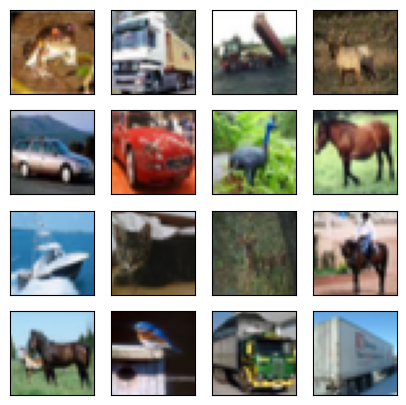

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(5, 5))

for i in range(16):
    ax[i//4][i%4].imshow(x_train[i])
    ax[i//4][i%4].set_xticks([])
    ax[i//4][i%4].set_yticks([])

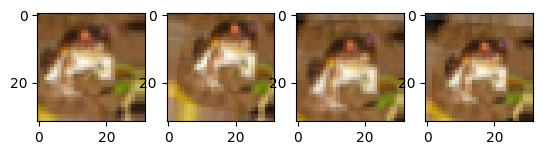

In [ ]:
# 증강된 데이터 보기
sample = x_train[0].reshape((1, 32, 32, 3))
imgs = datagen.flow(sample, batch_size=4)

fig, ax = plt.subplots(1, 4)

for i, img in enumerate(imgs):
    ax[i].imshow(img.reshape(32, 32, 3))
    if i == 3:
        break

In [ ]:
def create_cifar_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),  # 28x28 이미지를 1차원 벡터로 변환
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),  # 128 뉴런의 완전 연결층
        layers.Dense(10, activation='softmax') # 10개의 출력 클래스 (0~9 숫자)
    ])

    # 모델 컴파일
    model.compile(optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

cifar_model = create_cifar_model()
cifar_aug_model = create_cifar_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
cifar_model.fit(x_small, y_small, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1833 - loss: 2.2024 - val_accuracy: 0.2747 - val_loss: 2.0343
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2974 - loss: 1.9715 - val_accuracy: 0.3073 - val_loss: 1.9457
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3245 - loss: 1.8924 - val_accuracy: 0.3239 - val_loss: 1.9009
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3476 - loss: 1.8420 - val_accuracy: 0.3389 - val_loss: 1.8607
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.3619 - loss: 1.8017 - val_accuracy: 0.3466 - val_loss: 1.8364


In [ ]:
aug_cifar_datagen = datagen.flow(x_small.reshape(-1, 32, 32, 3), y_small, batch_size=64)

cifar_aug_model.fit(aug_cifar_datagen, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.1838 - loss: 2.2228 - val_accuracy: 0.2583 - val_loss: 2.0309
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.2667 - loss: 2.0301 - val_accuracy: 0.2899 - val_loss: 1.9625
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.2969 - loss: 1.9618 - val_accuracy: 0.3198 - val_loss: 1.9172
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3130 - loss: 1.9153 - val_accuracy: 0.3220 - val_loss: 1.8784
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.3188 - loss: 1.8858 - val_accuracy: 0.3560 - val_loss: 1.8193


CIFAR-10 데이터셋에선 증강 기법이 효과가 있는 것을 알 수 있습니다!

이는 CIFAR-10 데이터가 MNIST에 비해 더 복잡한 패턴을 가졌기 때문입니다. 따라서 최대한 다양한 유형의 패턴을 보는 것이 모델의 성능 향상에 유리하게 작용했을 가능성이 높습니다.